# Clustering Travel Agency Booking Data

In [213]:
# Import  modules
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
# Read  dataset
file_name = "travel.csv"
travel = pd.read_csv(file_name)

In [215]:
# Preview data
travel.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,03/11/2014 16:02,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,13/03/2013 19:25,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,13/10/2014 13:20,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,05/11/2013 10:40,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,10/06/2014 13:34,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [216]:
# Get some base information on dataset
print ("Rows     : " , travel.shape[0])
print ("Columns  : " , travel.shape[1])
print ("\nFeatures : \n" ,travel.columns.tolist())
print ("\nMissing values :  ", travel.isnull().sum().values.sum())
print ("\nUnique values :  \n", travel.nunique())

Rows     :  100000
Columns  :  25

Features : 
 ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Missing values :   36329

Unique values :  
 Unnamed: 0                   100000
date_time                     93312
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co     

In [217]:
# Get statistics for Numerical Columns
travel.info() 
corr_matrix_data = travel.drop(columns=['date_time','srch_ci','srch_co'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

In [218]:
# Find where the missing values are located
travel.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [219]:
# Create Corelation Matrix
corr = corr_matrix_data.corr()
corr

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,...,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,...,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,...,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,...,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,...,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,...,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,...,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,...,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,...,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,...,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


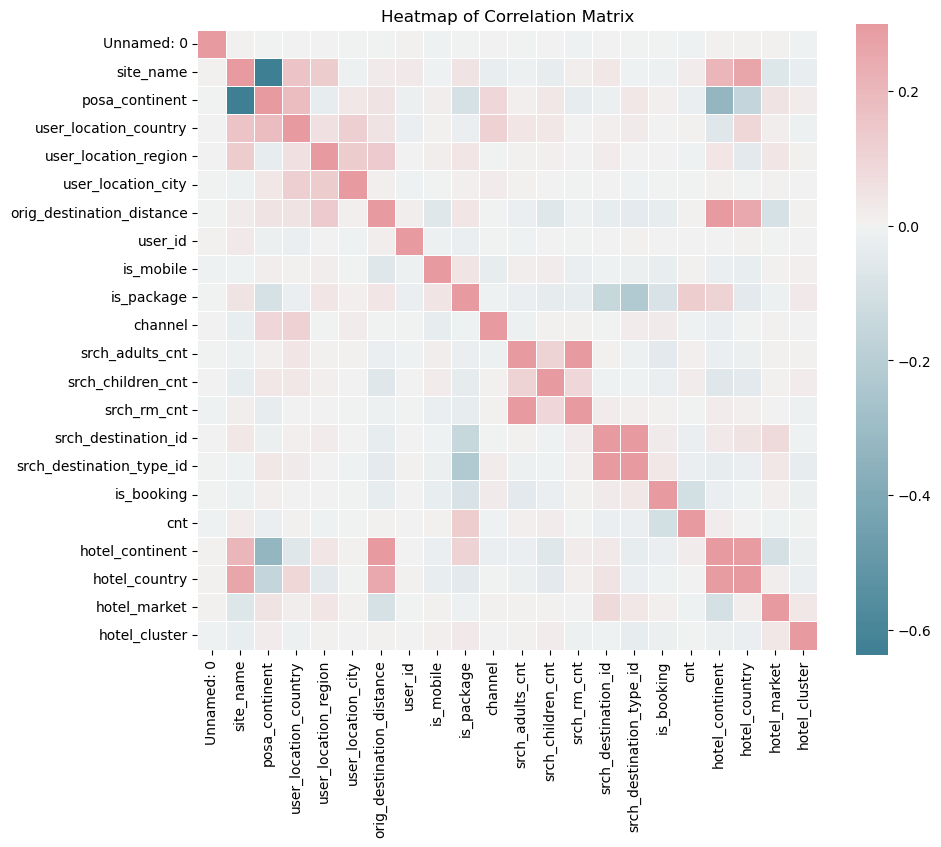

In [262]:

def generate_heatmap(corr, figsize=(10, 10), vmax=0.3, center=0, shrink=0.82):
    plt.figure(figsize=figsize)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(
        corr,
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values,
        cmap=cmap,
        vmax=vmax,
        center=center,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": shrink},
    )
    plt.title('Heatmap of Correlation Matrix')
    plt.savefig('Heatmap.jpg')
    plt.show()
    
generate_heatmap(corr, figsize=(10, 10), vmax=0.3, center=0, shrink=0.82)


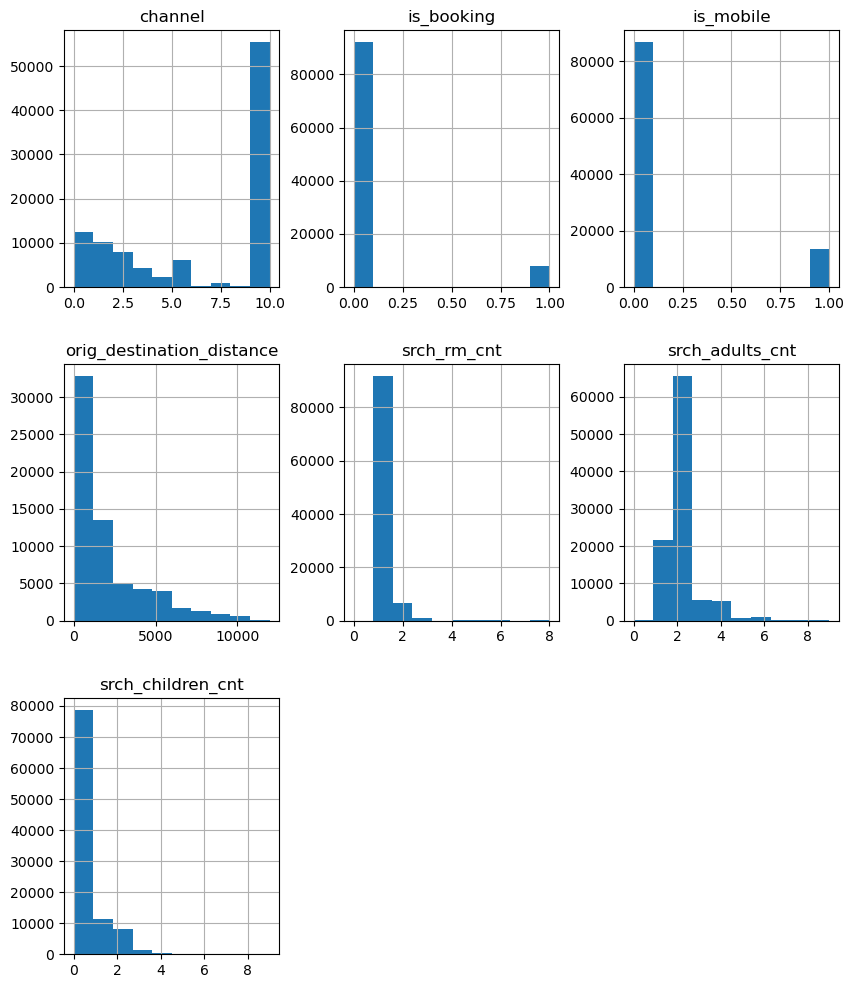

In [225]:
#Create bar chart
import matplotlib.pyplot as plt

def plot_histograms(data, columns, figsize=(10, 12)):
   
    data[columns].hist(figsize=figsize)
    plt.show()


plot_histograms(travel, ['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt'])


In [180]:
travel.rename(columns={'Unnamed: 0':'user_id'}, inplace=True)
travel = travel.reset_index()
travel.columns = travel.columns.get_level_values(0)
travel.head()

,index,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,24636210,03/11/2014 16:02,24,2,77,871,36643,456.1151,792280,...,0,1,8286,1,0,1,0,63,1258,68
1,1,19837144,13/03/2013 19:25,11,3,205,135,38749,232.4737,961995,...,0,1,1842,3,0,1,2,198,786,37
2,2,13066459,13/10/2014 13:20,2,3,66,314,48562,4468.2720,495669,...,0,1,8746,1,0,1,6,105,29,22
3,3,4691082,05/11/2013 10:40,11,3,205,411,52752,171.6021,106611,...,0,1,6210,3,1,1,2,198,1234,42
4,4,4878884,10/06/2014 13:34,2,3,66,174,50644,NaN,596177,...,1,1,12812,5,0,1,2,50,368,83


# Do some Logic Checks

In [255]:
# Use crosstab to group the counts
pd.crosstab(travel['srch_adults_cnt'], travel['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [182]:
# Then we sum the counts of travellers and drop the rows that area equal to zero
travel.drop(travel[travel['srch_adults_cnt'] + travel['srch_children_cnt']==0].index).head()

,index,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,24636210,03/11/2014 16:02,24,2,77,871,36643,456.1151,792280,...,0,1,8286,1,0,1,0,63,1258,68
1,1,19837144,13/03/2013 19:25,11,3,205,135,38749,232.4737,961995,...,0,1,1842,3,0,1,2,198,786,37
2,2,13066459,13/10/2014 13:20,2,3,66,314,48562,4468.2720,495669,...,0,1,8746,1,0,1,6,105,29,22
3,3,4691082,05/11/2013 10:40,11,3,205,411,52752,171.6021,106611,...,0,1,6210,3,1,1,2,198,1234,42
4,4,4878884,10/06/2014 13:34,2,3,66,174,50644,NaN,596177,...,1,1,12812,5,0,1,2,50,368,83


In [184]:
travel.head()

,index,user_id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,24636210,03/11/2014 16:02,24,2,77,871,36643,456.1151,792280,...,0,1,8286,1,0,1,0,63,1258,68
1,1,19837144,13/03/2013 19:25,11,3,205,135,38749,232.4737,961995,...,0,1,1842,3,0,1,2,198,786,37
2,2,13066459,13/10/2014 13:20,2,3,66,314,48562,4468.2720,495669,...,0,1,8746,1,0,1,6,105,29,22
3,3,4691082,05/11/2013 10:40,11,3,205,411,52752,171.6021,106611,...,0,1,6210,3,1,1,2,198,1234,42
4,4,4878884,10/06/2014 13:34,2,3,66,174,50644,NaN,596177,...,1,1,12812,5,0,1,2,50,368,83


In [185]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [186]:
city_groups.shape

(4531, 9)

In [187]:
city_data.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,1.0,0.0,232.4737,0,0,2,0,1,38749
2,7.0,172.0,4468.2720,0,1,2,0,1,48562
3,1.0,2.0,171.6021,0,0,2,0,1,52752
5,1.0,0.0,53.7481,0,0,2,0,1,38273


In [188]:
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,28370.730082,3.371721,56.345617,1796.236344,0.134931,0.251183,2.068621,0.363318,1.120341
std,16461.359756,2.078043,46.340213,1609.729877,0.226245,0.302437,0.657345,0.535894,0.369686
min,0.000000,1.000000,0.000000,0.907100,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13978.000000,2.142857,25.291667,724.472890,0.000000,0.000000,1.857143,0.000000,1.000000
50%,28587.000000,3.000000,47.714286,1435.846152,0.000000,0.169811,2.000000,0.216216,1.000000
75%,42569.500000,4.000000,72.000000,2249.866586,0.192308,0.375000,2.130435,0.500000,1.102564
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


In [256]:
#Magnitude variations in features are large 

city_groups_std = city_groups.copy()
cols = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_groups_std[cols] = preprocessing.scale(city_groups_std[cols])

city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558


In [190]:
city_groups_std.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03
mean,28370.730082,-1.536817e-16,8.311358e-17,-1.176136e-17,-1.568181e-18,-8.919028e-17,3.606816e-17,3.293180e-17,-5.331815e-17
std,16461.359756,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00
min,0.000000,-1.141451e+00,-1.216046e+00,-1.115422e+00,-5.964604e-01,-8.306230e-01,-3.147282e+00,-6.780416e-01,-3.255578e-01
25%,13978.000000,-5.914218e-01,-6.702036e-01,-6.658768e-01,-5.964604e-01,-8.306230e-01,-3.217515e-01,-6.780416e-01,-3.255578e-01
50%,28587.000000,-1.789003e-01,-1.862806e-01,-2.239071e-01,-5.964604e-01,-2.690845e-01,-1.044030e-01,-2.745286e-01,-3.255578e-01
75%,42569.500000,3.023748e-01,3.378515e-01,2.818363e-01,2.536310e-01,4.094411e-01,9.404560e-02,2.550822e-01,-4.809179e-02
max,56507.000000,1.762828e+01,6.682933e+00,5.984243e+00,3.824015e+00,2.476215e+00,1.054567e+01,1.425194e+01,1.861150e+01


# Implement clustering via K-means

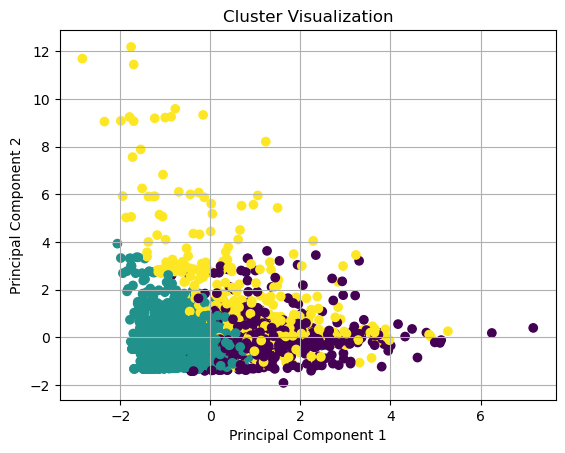

In [242]:
#Cluster 3
def perform_kmeans_clustering(data, features, n_clusters=3, max_iter=300, random_state=None):
   
    km = cluster.KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    data['cluster'] = km.fit_predict(data[features])
    return data

def perform_pca_for_visualization(data, features, n_components=2):
  
    pca = decomposition.PCA(n_components=n_components, whiten=True)
    transformed_data = pca.fit_transform(data[features])
    data['x'] = transformed_data[:, 0]
    data['y'] = transformed_data[:, 1]
    return data

def plot_clusters(data):
  
    plt.scatter(data['x'], data['y'], c=data['cluster'])
    plt.title("Cluster Visualization")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()


city_groups_std = perform_kmeans_clustering(city_groups_std, features_to_explore, n_clusters=3)
city_groups_std = perform_pca_for_visualization(city_groups_std, features_to_explore)
plot_clusters(city_groups_std)


In [192]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,2,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,1,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,1,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,1,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,1,0.457189,-0.527191


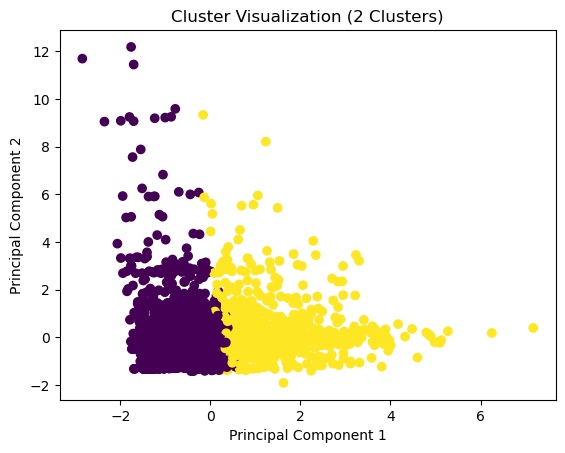

In [227]:
#Cluster two

def kmeans_clustering(data, features, n_clusters=2, max_iter=300, random_state=None):
   
    km = cluster.KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    data['cluster'] = km.fit_predict(data[features])
    return data

def apply_pca(data, features, n_components=2):
   
    pca = decomposition.PCA(n_components=n_components, whiten=True)
    pca_result = pca.fit_transform(data[features])
    data['x'] = pca_result[:, 0]
    data['y'] = pca_result[:, 1]
    return data

def visualize_clusters(data):
   
    plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='viridis')
    plt.title("Cluster Visualization (2 Clusters)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
     plt.grid()
    plt.show()


city_groups_std = kmeans_clustering(city_groups_std, features_to_explore, n_clusters=2)
city_groups_std = apply_pca(city_groups_std, features_to_explore)
visualize_clusters(city_groups_std)


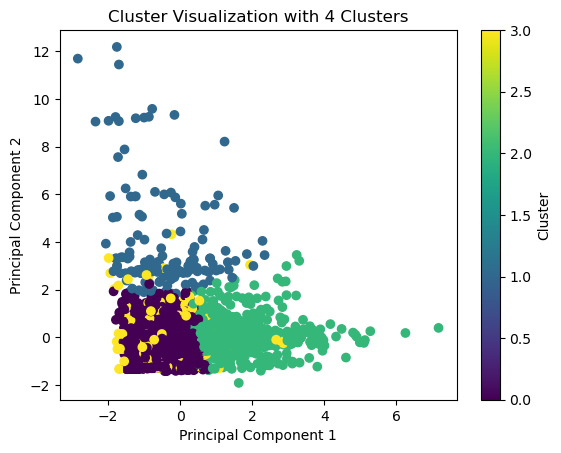

In [228]:

def perform_kmeans_clustering(data, features, n_clusters=4, max_iter=300, random_state=None):
 
    km = cluster.KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    data['cluster'] = km.fit_predict(data[features])
    return data

def perform_pca_and_add_coordinates(data, features, n_components=2):
   
    pca = decomposition.PCA(n_components=n_components, whiten=True)
    pca_result = pca.fit_transform(data[features])
    data['x'] = pca_result[:, 0]
    data['y'] = pca_result[:, 1]
    return data

def plot_clusters(data, title="Cluster Visualization"):
    
    
    plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='viridis')
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Cluster')
     plt.grid()
    plt.show()


city_groups_std = perform_kmeans_clustering(city_groups_std, features_to_explore, n_clusters=4)
city_groups_std = perform_pca_and_add_coordinates(city_groups_std, features_to_explore)
plot_clusters(city_groups_std, title="Cluster Visualization with 4 Clusters")


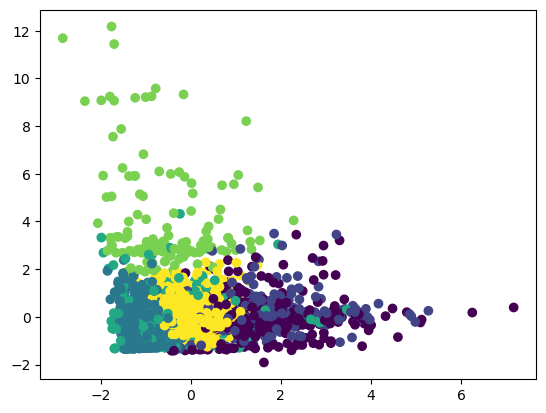

In [195]:
# Now with 6

km = cluster.KMeans(n_clusters=6, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

#  Elbow Method

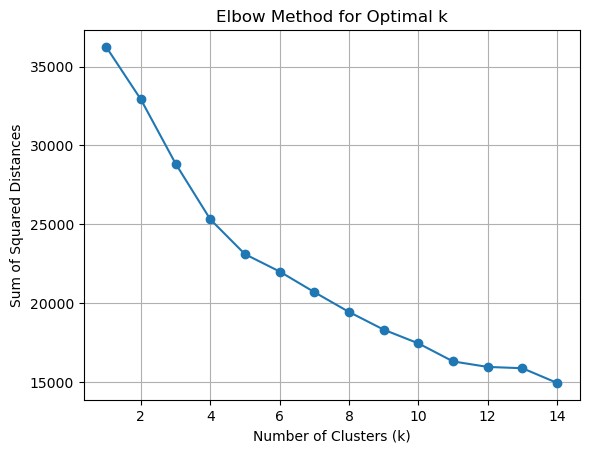

In [264]:
def calculate_inertia(data, features, max_k=15, max_iter=300, random_state=None):
    
    sum_of_squared_distances = []
    for k in range(1, max_k):
        km = KMeans(n_clusters=k, max_iter=max_iter, random_state=random_state)
        km.fit(data[features])
        sum_of_squared_distances.append(km.inertia_)
    return sum_of_squared_distances

def plot_elbow_method(k_values, inertias):
   
   
    plt.plot(k_values, inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method for Optimal k')
    plt.grid()
    plt.savefig('Elbow.jpg')
    plt.show()


K = range(1, 15)
inertias = calculate_inertia(city_groups_std, features_to_explore, max_k=15)
plot_elbow_method(K, inertias)


# Silhouette Coefficient

In [241]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(city_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    

For n_clusters=2, The Silhouette Coefficient is 0.26561835237193804
For n_clusters=3, The Silhouette Coefficient is 0.2543642272446069
For n_clusters=4, The Silhouette Coefficient is 0.26311887852311433
For n_clusters=5, The Silhouette Coefficient is 0.2588823304982965
For n_clusters=6, The Silhouette Coefficient is 0.2623903190135903
For n_clusters=7, The Silhouette Coefficient is 0.1947027242283871
For n_clusters=8, The Silhouette Coefficient is 0.16758570698520617
For n_clusters=9, The Silhouette Coefficient is 0.13402973608311539
For n_clusters=10, The Silhouette Coefficient is 0.17875122873209698


# Let's stick with K=3

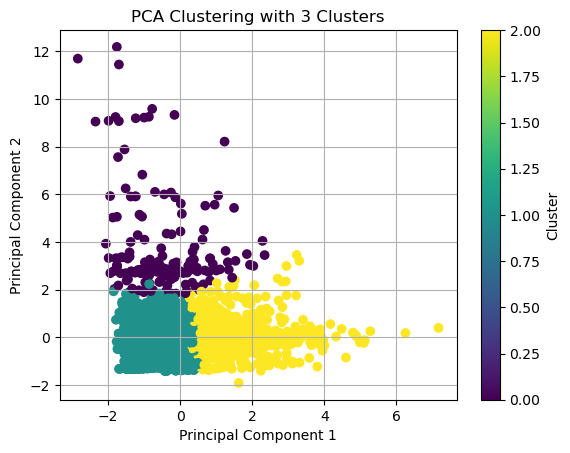

In [266]:
def perform_kmeans(data, features, n_clusters=3, max_iter=300, random_state=None):
  
    km = cluster.KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)
    data['cluster'] = km.fit_predict(data[features])
    return data

def perform_pca(data, features, n_components=2):
 
    pca = decomposition.PCA(n_components=n_components, whiten=True)
    transformed_data = pca.fit_transform(data[features])
    data['x'] = transformed_data[:, 0]
    data['y'] = transformed_data[:, 1]
    return data

def plot_pca_clusters(data, x_col='x', y_col='y', cluster_col='cluster', title="PCA Clustering Visualization"):

    plt.scatter(data[x_col], data[y_col], c=data[cluster_col], cmap='viridis')
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Cluster')
    plt.grid()
    plt.savefig('Cluster.jpg')
    plt.show()


city_groups_std = perform_kmeans(city_groups_std, features_to_explore, n_clusters=3)
city_groups_std = perform_pca(city_groups_std, features_to_explore)
plot_pca_clusters(city_groups_std, title="PCA Clustering with 3 Clusters")


# Step 4: Profile and Inspect our 3 clusters

In [165]:
# We will merge the two dataframes based on a common column user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean() # for every column

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28849.737998,5.105142,96.171188,2954.337994,0.116525,0.504264,2.012299,0.316395,1.069145
1,28054.590446,2.709517,40.724360,1350.581178,0.142120,0.155474,1.981404,0.371270,1.071975
2,30864.419753,3.056584,56.994496,1648.398660,0.135237,0.186317,4.186420,0.565175,2.446193


In [166]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,1,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,0,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,0,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,0,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,0,0.457189,-0.527191


In [167]:
city_groups_std['cluster'].unique()

array([1, 0, 2])

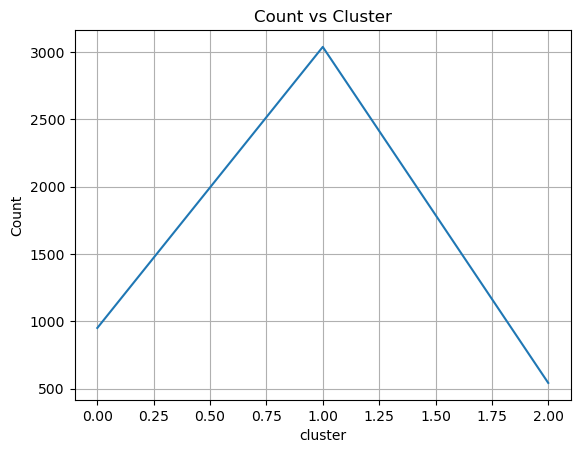

In [253]:
import matplotlib.pyplot as plt

def plot_cluster_counts(data, cluster_col, group_col, plot_kind='line', title="Count vs Cluster", ylabel="Count"):
  
    data.groupby(cluster_col)[group_col].agg('count').plot(kind=plot_kind)
    plt.grid()
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


plot_cluster_counts(city_groups_std, 'cluster', 'user_location_city', plot_kind='line', title="Count vs Cluster")


In [169]:
city_groups_std[features_to_explore].shape

(4531, 8)